# Introduction


This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [405]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

### Notebook Presentation

In [406]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [407]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

In [408]:
print(df_data.shape)
print(df_data.columns)

(4324, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates
 

In [409]:
cleaned_data = df_data.reset_index()
df_data.isna().values.any()
print(df_data.isnull().values.any())
print(df_data.duplicated().values.any())


True
False


In [410]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [411]:
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
print(cleaned_data.shape)
cleaned_data.tail(5)

(4324, 8)


,index,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Descriptive Statistics

In [412]:
print(cleaned_data.dtypes)
cleaned_data.describe()

index              int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object


,index
count,"4,324.00"
mean,"2,161.50"
std,"1,248.38"
min,0.00
25%,"1,080.75"
50%,"2,161.50"
75%,"3,242.25"
max,"4,323.00"


In [413]:
cleaned_data["Price"] = pd.to_numeric(cleaned_data["Price"].str.replace(",","",regex=False))
cleaned_data['Price'] = cleaned_data['Price'].round(2)

# Number of Launches per Company

In [414]:
launches_per_company = cleaned_data.groupby("Organisation").count().sort_values(by="index",ascending=False).reset_index()
launches_per_company.head(2)

,Organisation,index,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,RVSN USSR,1777,1777,1777,1777,1777,2,1777
1,Arianespace,279,279,279,279,279,96,279


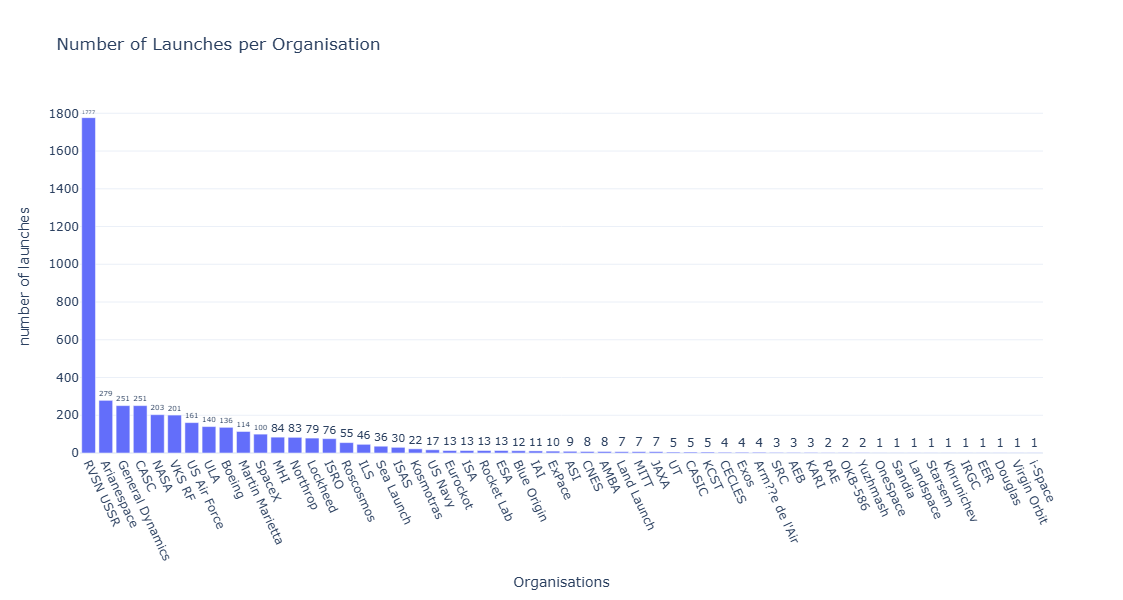

In [415]:
fig = px.bar(x= launches_per_company["Organisation"], y= launches_per_company["index"], title="Number of Launches per Organisation")
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=65)
fig.update_yaxes(title_text="number of launches")
fig.update_layout(
    height=600, 
    width=900,
    template="plotly_white"
)

fig.show()

# Number of Active versus Retired Rockets

In [416]:
active_vs_retired = cleaned_data.groupby("Rocket_Status").agg({"index":"count"})
active_vs_retired = active_vs_retired.rename(columns={"index":"Count"}).reset_index()
active_vs_retired

,Rocket_Status,Count
0,StatusActive,790
1,StatusRetired,3534


# Distribution of Mission Status

In [417]:
mission_status = cleaned_data.groupby("Mission_Status").agg({"index":"count"})
mission_status = mission_status.rename(columns={"index":"Count"}).reset_index()
mission_status

,Mission_Status,Count
0,Failure,339
1,Partial Failure,102
2,Prelaunch Failure,4
3,Success,3879


# How Expensive are the Launches? 

In [418]:

launch_cost = cleaned_data.groupby("Mission_Status").agg({"index":"count",
                                                            "Price":"sum"})
launch_cost = launch_cost.rename(columns={"index":"Count"}).reset_index()

In [419]:
fig = px.histogram(
    cleaned_data[cleaned_data['Price'] < 1000],  
    x="Price",
    nbins=50,
    title="Distribution of Rocket Launch Prices (USD Millions)"
)
fig.update_layout(bargap=0.1, template="plotly_white")
fig.show()

# Choropleth Map to Show the Number of Launches by Country

In [420]:
cleaned_data["Country"] = cleaned_data["Location"].str.extract(r',\s*([^,]+)$')


cleaned_data["Country"] = cleaned_data["Country"].str.strip()
cleaned_data["Country_code"] = cleaned_data["Country"]


name_change_dict = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Shahrud Missile Test Site": "Iran",
    "Yellow Sea": "China",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA"
}

for name, new_name in name_change_dict.items():
    cleaned_data["Country"] = cleaned_data["Country"].str.replace(name, new_name, regex=True)

cleaned_data["Country"] = cleaned_data["Country"].str.strip()
cleaned_data["Country_code"] = cleaned_data["Country"]


country_code_dict = {
    'China': 'CHN',
    'France': 'FRA',
    'India': 'IND',
    'Japan': 'JPN',
    'Kazakhstan': 'KAZ',
    'New Zealand': 'NZL',
    'Russian Federation': 'RUS',
    'USA': 'USA'
}

for name, code in country_code_dict.items():
    cleaned_data["Country_code"] = cleaned_data["Country_code"].str.replace(name, code, regex=True)
number_of_launches_by_country = cleaned_data.groupby('Country_code').agg({"index":"count"}).reset_index()

In [421]:
fig = px.choropleth(number_of_launches_by_country, locations='Country_code', color='index',
                           color_continuous_scale="Viridis",
                           range_color=(0, 500),
                           labels={'index':'Number of lunches'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Choropleth Map to Show the Number of Failures by Country


In [422]:
failures_by_country = cleaned_data.loc[cleaned_data['Mission_Status'] == 'Failure'].groupby('Country_code').agg({'index':'count'}).reset_index()
fig = px.choropleth(failures_by_country, locations='Country_code',color='index',
                   color_continuous_scale="Reds", range_color=(0,20))
fig.show()

# Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [423]:
fig = px.sunburst(cleaned_data, path=['Country', 'Organisation', 'Mission_Status'], values='Price')
fig.show()

# Total Amount of Money Spent by Organisation on Space Missions

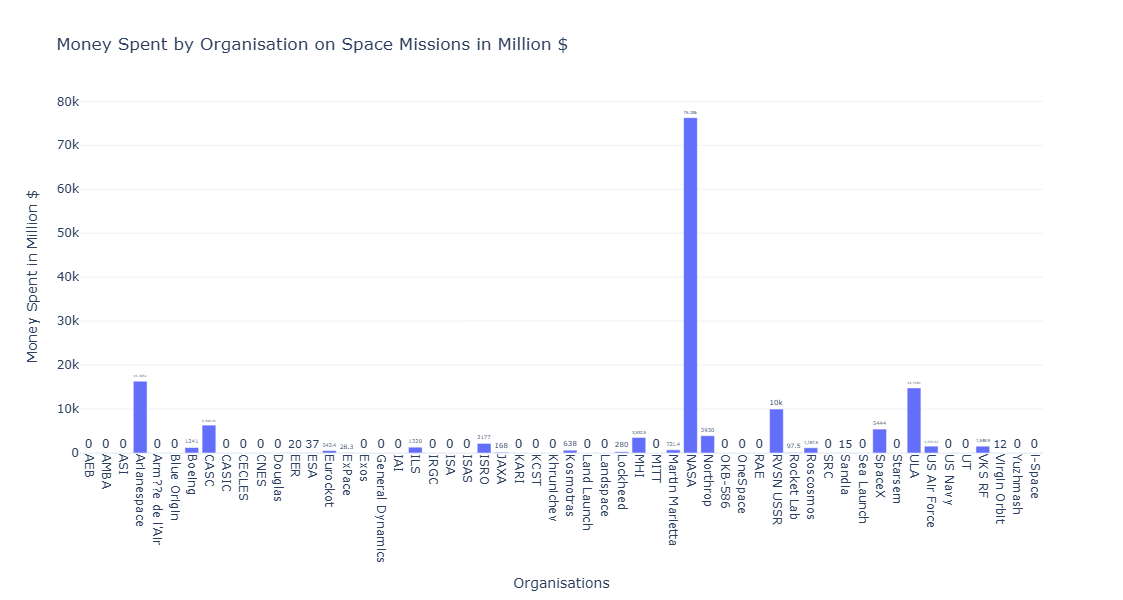

In [424]:
money_spent_by_org = cleaned_data.groupby('Organisation').agg({'Price':['sum','mean']}).reset_index()
money_spent_by_org.columns = ['Organisation', 'Total_Spent', 'Average_Spent']

fig = px.bar(x=money_spent_by_org['Organisation'], y=money_spent_by_org['Total_Spent'], title='Money Spent by Organisation on Space Missions in Million $')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=90)
fig.update_yaxes(title_text="Money Spent in Million $")
fig.update_layout(
    height=600, 
    width=1100,
    template="plotly_white"
)

fig.show()

# Amount of Money Spent by Organisation per Launch

In [425]:
fig = px.bar(x=money_spent_by_org['Organisation'], y=money_spent_by_org['Average_Spent'], title='Money Spent by Organisation Per Launch')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=90)
fig.update_yaxes(title_text="Money Spent in Million $")
fig.update_layout(
    height=600, 
    width=1100,
    template="plotly_white"
)

fig.show()

# Chart the Number of Launches per Year

In [426]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['Date'])
cleaned_data['Year'] = cleaned_data['Date'].dt.year
cleaned_data['Month'] = cleaned_data['Date'].dt.month_name()
launches_per_year = cleaned_data.groupby('Year').size().reset_index(name='Launch_Count')


In [427]:
fig = px.bar(x=launches_per_year['Year'], y=launches_per_year['Launch_Count'], title='Number of Launches per Year')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_xaxes(title_text='Years')
fig.update_yaxes(title_text='Launch Count')
fig.update_layout(
    height=600,
    width=1100,
    template='plotly_white'
)
fig.show()

# Number of Launches Month-on-Month until the Present

In [428]:
launches_per_month = cleaned_data.groupby('Month').size().reset_index(name='Launch_Count')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]


launches_per_month['Month'] = pd.Categorical(
    launches_per_month['Month'],
    categories=month_order,
    ordered=True
)
launches_per_month = launches_per_month.sort_values('Month')


In [429]:
fig = px.bar(x=launches_per_month['Month'], y=launches_per_month['Launch_Count'], title='Number of Launches per Month')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Launch Count')
fig.update_layout(
    height=600,
    width=900,
    template='plotly_white'
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

In [430]:
print(launches_per_month[launches_per_month['Launch_Count']==launches_per_month['Launch_Count'].max()])
print(launches_per_month[launches_per_month['Launch_Count']==launches_per_month['Launch_Count'].min()])

      Month  Launch_Count
2  December           430
     Month  Launch_Count
4  January           265


# How has the Launch Price varied Over Time? 

In [431]:
avg_price_ov_time= cleaned_data.groupby('Year').agg({'Price':'mean'}).reset_index()
fig = px.line(avg_price_ov_time,x='Year',y='Price')
fig.update_layout(
    height=600,
    width=1100,
    template='plotly_white',
    xaxis=dict(
        tickmode='array',
        tickvals=avg_price_ov_time['Year'],
        tickangle=90)
)

fig.show()

# Plotly Pie Chart comparing the total number of launches of the USSR and the USA


In [432]:
# total number of launches of the USSR and the USA
launches_us_vs_rassia = cleaned_data[cleaned_data['Country'].isin(['USA','Russian Federation'])]
launches_us_vs_rassia_grouped = launches_us_vs_rassia.groupby('Country').agg({'index':'count'}).reset_index()
launches_us_vs_rassia_grouped

,Country,index
0,Russian Federation,1354
1,USA,1327


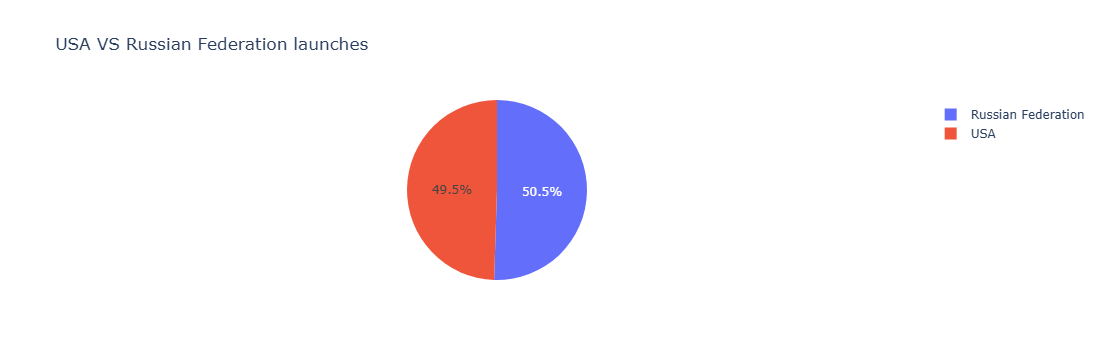

In [433]:
fig = px.pie(launches_us_vs_rassia_grouped, values='index', names='Country', title='USA VS Russian Federation launches')
fig.show()

# Total Number of Launches Year-On-Year by the Two Superpowers

In [434]:
launches_us_vs_rassia_YoY = launches_us_vs_rassia.groupby(['Year', 'Country']).size().reset_index(name='Launch_Count')

In [435]:
fig = px.bar(launches_us_vs_rassia_YoY, x='Year', y='Launch_Count',
             hover_data=['Country'], color='Country',
             labels={'pop':'population of Oceania'}, height=400)
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.show()

# Total Number of Mission Failures Year on Year.

In [436]:
failures_yoy = cleaned_data.loc[cleaned_data['Mission_Status'] == 'Failure'].groupby('Year').size().reset_index(name="failures_count")


In [437]:
fig = px.bar(failures_yoy, x='Year', y='failures_count',
            )
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.show()

# Percentage of Failures over Time


In [438]:
failures_yoy['failure_per'] =  (failures_yoy['failures_count']/sum(launches_per_year['Launch_Count']) * 100)

In [439]:
fig = px.bar(failures_yoy, x='Year', y='failure_per',
            )
fig.update_traces(texttemplate='%{y:.2f}',textposition='outside')
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.update_yaxes(title_text='Failure Percentage')
fig.show()

# Lead Country in terms of Total Number of Launches

In [440]:
lead_country = cleaned_data.groupby(['Year','Country']).agg({'index':'count'}).reset_index()

lead_country = (
    lead_country.loc[lead_country.groupby('Year')['index'].idxmax()]
    .reset_index(drop=True)
)

fig = px.bar(
    lead_country,
    x='Year',
    y='index',            
    color='Country',      
    text='Country',         
    title='Lead Country by Rocket Launches (Year-wise)',
    height=500,
    width=1100
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', xaxis=dict(dtick=1))
fig.show()

# Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

In [441]:
lead_org = cleaned_data.groupby(['Year','Organisation']).agg({'index':'count'}).reset_index()

lead_org = (
    lead_org.loc[lead_org.groupby('Year')['index'].idxmax()]
    .reset_index(drop=True)
)


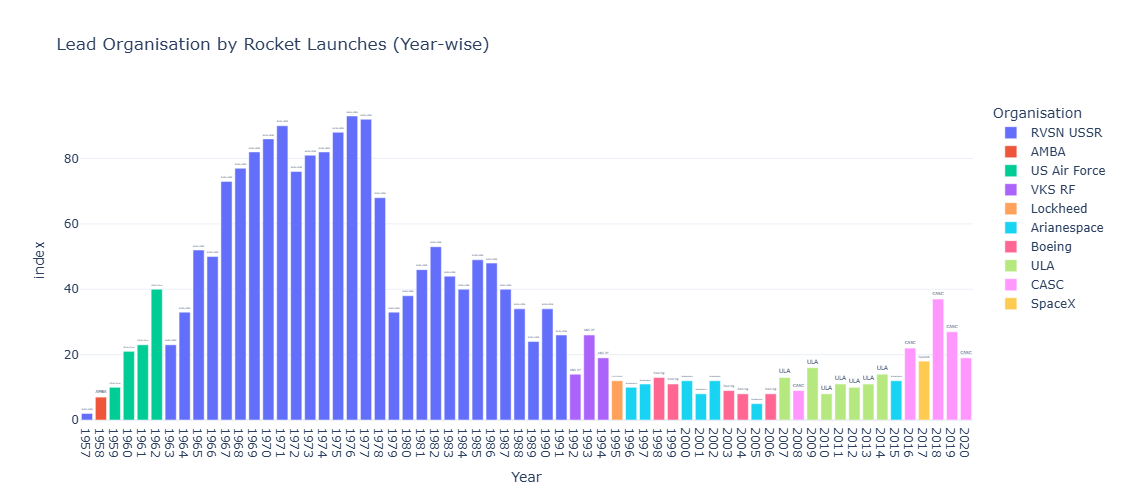

In [442]:
fig = px.bar(
    lead_org,
    x='Year',
    y='index',            
    color='Organisation',      
    text='Organisation',         
    title='Lead Organisation by Rocket Launches (Year-wise)',
    height=500,
    width=1100
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', xaxis=dict(dtick=1))
fig.show()